In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
df1 = df.copy()

In [9]:
df1 = df1.dropna(subset = ['director','country','cast','date_added'])

In [10]:
df1.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,1
duration,3


In [11]:
df1['rating'].value_counts()

,count
rating,
TV-MA,1822
TV-14,1214
R,778
PG-13,470
TV-PG,431
PG,275
TV-G,84
TV-Y7,76
TV-Y,76


In [12]:
type_of_shows = df1['type'].value_counts()

In [13]:
df1['country'].value_counts()

,count
country,
United States,1849
India,875
United Kingdom,183
Canada,107
Spain,91
...,...
"United States, United Kingdom, France, Germany, Japan",1
"Spain, France, United States",1
"Indonesia, South Korea, Singapore",1


In [14]:
df1['release_year'].value_counts()

,count
release_year,
2017,658
2018,648
2016,577
2019,519
2020,442
...,...
1945,1
1946,1
1942,1


<Axes: xlabel='type', ylabel='count'>

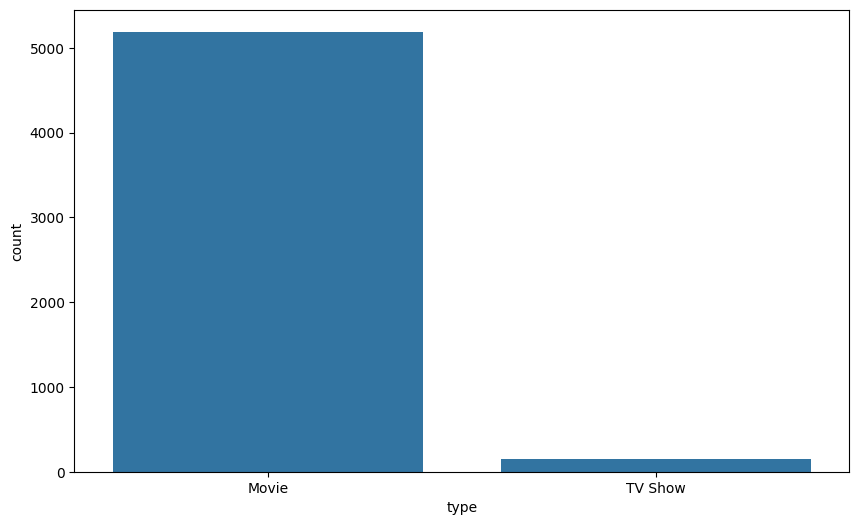

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='type',data=df1)

In [16]:
df1['date_added'] = pd.to_datetime(df1['date_added'],errors="coerce")
df1['year added'] = df1['date_added'].dt.year
df1['month added']  =df1['date_added'].dt.month_name()

Text(0.5, 1.0, 'No. of shows/movies released every year')

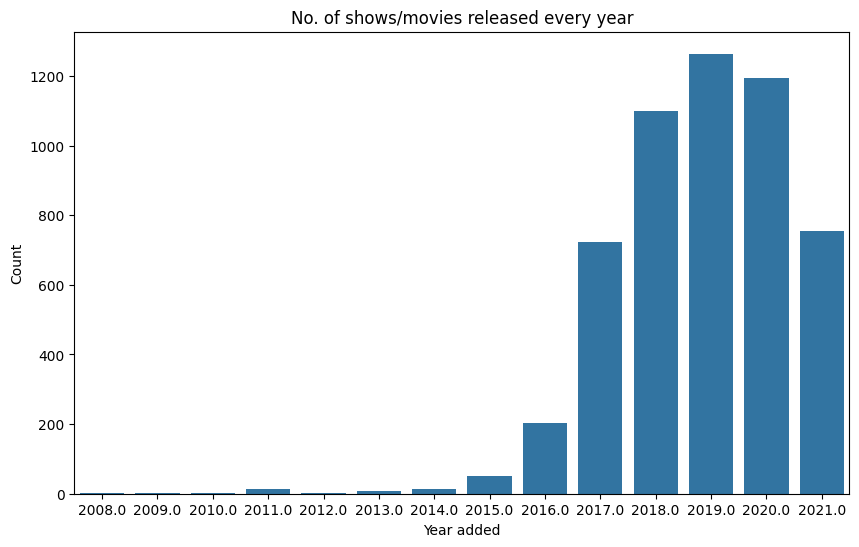

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'year added',data=df1)
plt.xlabel("Year added")
plt.ylabel("Count")
plt.title("No. of shows/movies released every year")

In [18]:
df1['first_country'] = df1['country'].apply(
    lambda x: x[0] if isinstance(x, list) else x.split(",")[0] if pd.notnull(x) else np.nan
)
df1['first_country']

,first_country
7,United States
8,United Kingdom
9,United States
12,Germany
24,India
...,...
8801,United Arab Emirates
8802,United States
8804,United States
8805,United States


In [19]:
top_countries = df1['first_country'].value_counts().head(10).reset_index()
top_countries.columns = ['first_country','count']

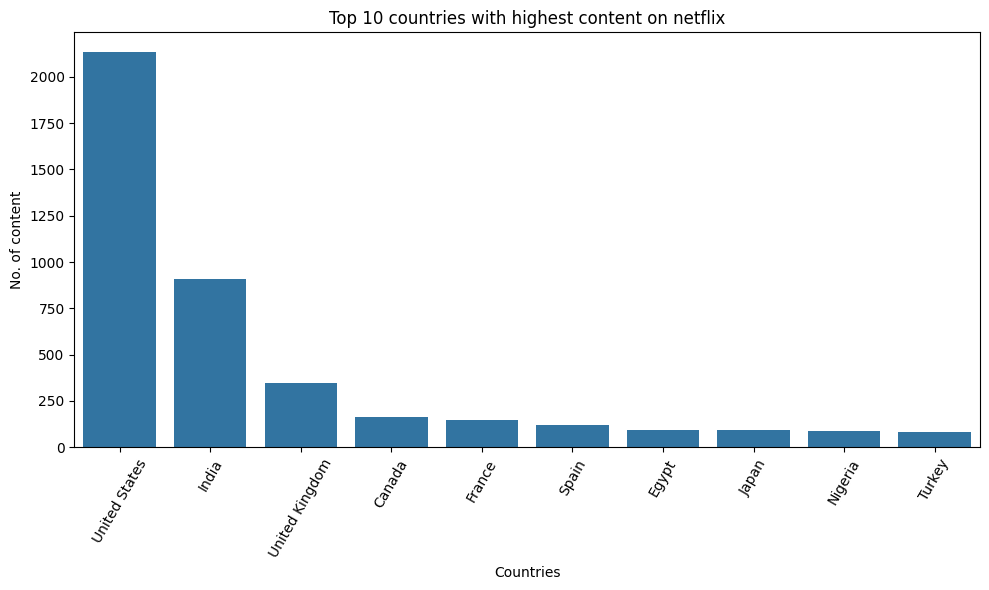

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='first_country',y='count',data=top_countries)
plt.xlabel("Countries")
plt.ylabel("No. of content")
plt.title("Top 10 countries with highest content on netflix")
plt.xticks(rotation=60)
plt.tight_layout()

In [22]:
df1['genre'] = df1['listed_in'].apply(
    lambda x: x[0] if isinstance(x, list) else x.split(",")[0] if pd.notnull(x) else np.nan
)
df1['genre']

,genre
7,Dramas
8,British TV Shows
9,Comedies
12,Dramas
24,Comedies
...,...
8801,Dramas
8802,Cult Movies
8804,Comedies
8805,Children & Family Movies


In [23]:
top_10_most_frequent_genre = df1['genre'].value_counts().head(10).reset_index()
top_10_most_frequent_genre.columns = ['genre','count']

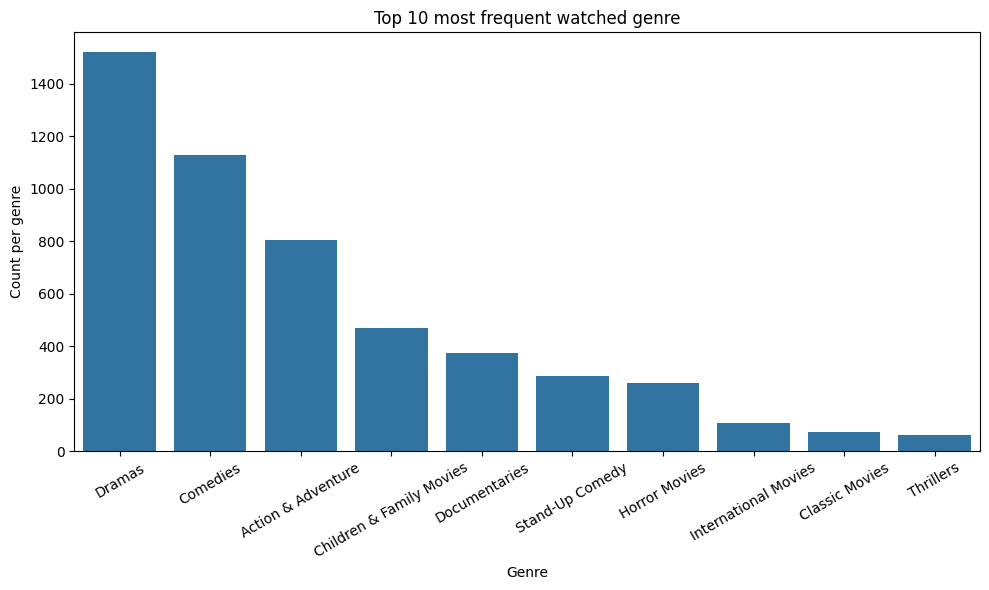

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='genre',y='count',data=top_10_most_frequent_genre)
plt.xlabel("Genre")
plt.ylabel("Count per genre")
plt.title("Top 10 most frequent watched genre")
plt.xticks(rotation=30)
plt.tight_layout()

In [26]:
movies_df = df1[df1['type']== "Movie"].copy()
tv_show_df = df1[df1['type']== "TV Show"].copy()

In [27]:
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(float)
tv_show_df['duration_seasons'] = tv_show_df['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)


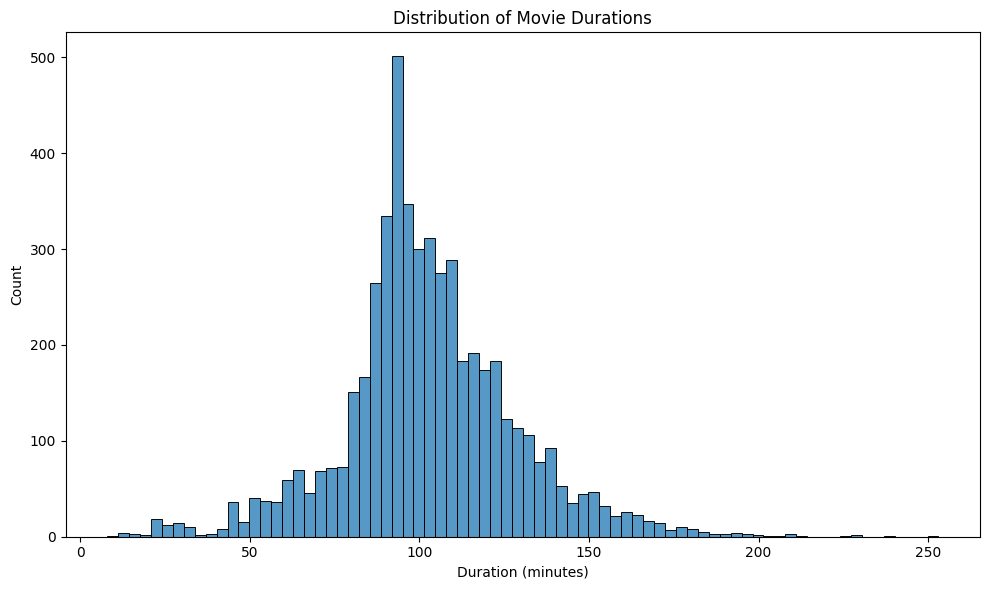

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(x='duration_minutes',data=movies_df)
plt.xlabel("Duration (minutes)")
plt.title("Distribution of Movie Durations")
plt.tight_layout()

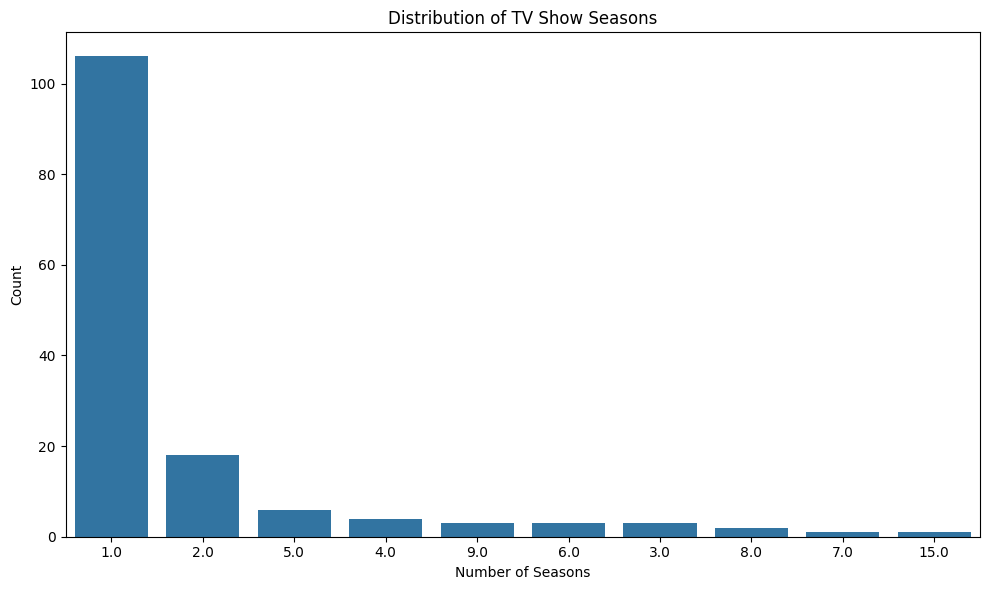

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='duration_seasons',data=tv_show_df,order=tv_show_df['duration_seasons'].value_counts().index)
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.title("Distribution of TV Show Seasons")
plt.tight_layout()

In [37]:
#top 10 directors with most content
top_10_directors = df1['director'].value_counts().head(10).reset_index()
top_10_directors.columns = ['director','count']

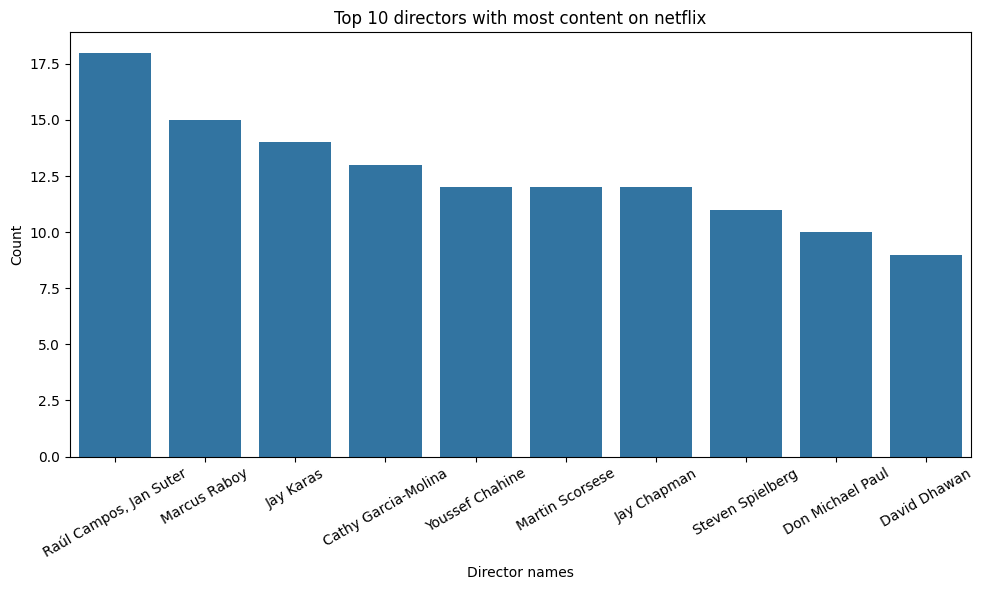

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='director', y = 'count',data=top_10_directors)
plt.xlabel("Director names")
plt.ylabel("Count")
plt.title("Top 10 directors with most content on netflix")
plt.xticks(rotation=30)
plt.tight_layout()

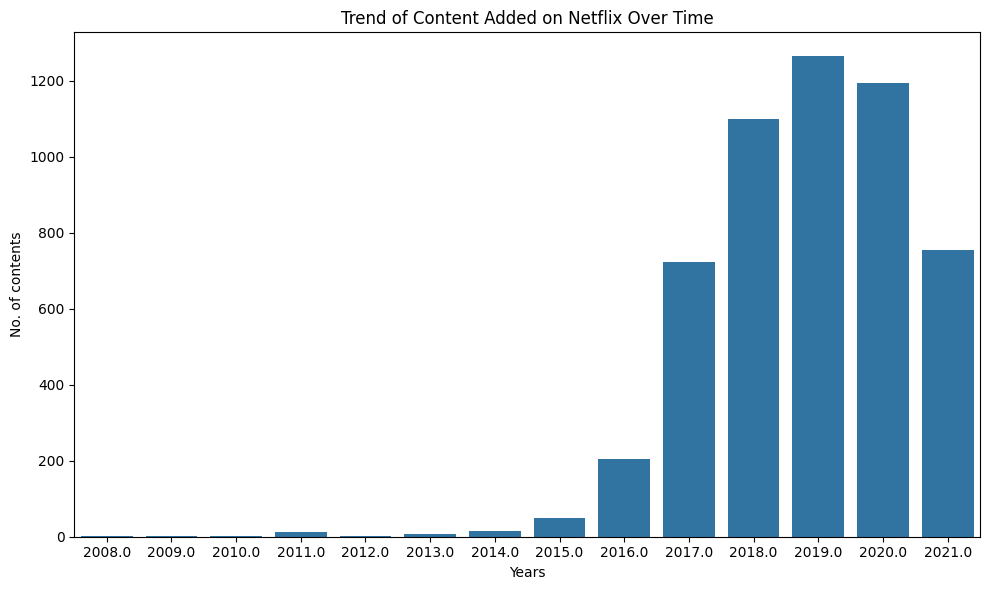

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x='year added',data=df1,order=sorted(df1['year added'].dropna().unique()))
plt.xlabel("Years")
plt.ylabel("No. of contents")
plt.title("Trend of Content Added on Netflix Over Time")
plt.tight_layout()

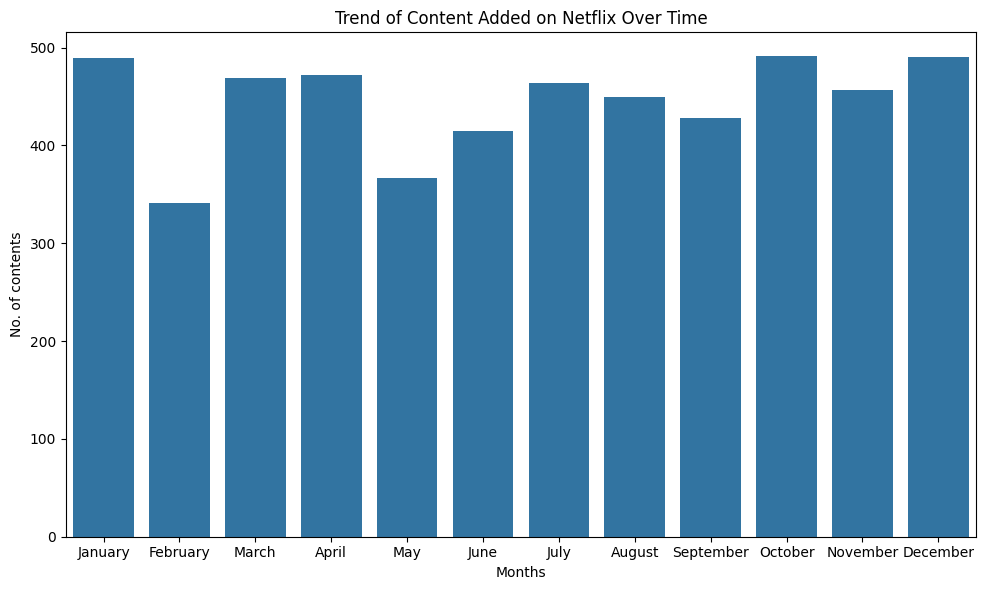

In [59]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(10,6))
sns.countplot(x='month added',data=df1,order = month_order)
plt.xlabel("Months")
plt.ylabel("No. of contents")
plt.title("Trend of Content Added on Netflix Over Time")
plt.tight_layout()

<Axes: >

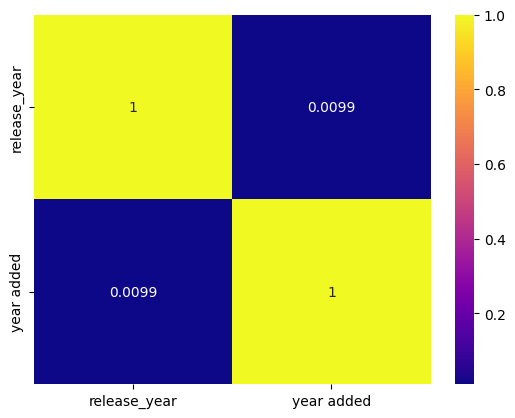

In [65]:
sns.heatmap(df1.corr(numeric_only=True),annot=True,cmap="plasma")

In [67]:
percentage_missing_values = df1.isnull().sum()/len(df1)*100

In [68]:
percentage_missing_values

,0
show_id,0.000000
type,0.000000
title,0.000000
director,0.000000
cast,0.000000
country,0.000000
date_added,0.074963
release_year,0.000000
rating,0.018741
duration,0.056222
